# Statistical Modeling 

Statistical modeling is a mathematical approach used to represent and analyze the relationships between variables in data. It involves constructing a model that captures the underlying patterns and structures within a dataset, often with the goal of making predictions or understanding the data better.


    Independent variables are also known as: predictor variables, input variables, explanatory variables, features
    
    Dependent variables are also known as: outcome variables, target variables, response variables


## Model Loss

A loss function evaluates how well your model represents the relationship between data variables.



## Simple Linear Regression

The model notation is 

$$y=mx+c$$

or, alternatively

$$y = \beta_0+ \beta_1 x $$

## Calculating M

### The Least-Squares Method

We can calculate $\hat{m}$ (the slope of the best-fit line) using this formula:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

Breaking down those components, we have:

* $\hat{m}$: the estimated slope
* $\rho$: the Pearson correlation, represented by the Greek letter "Rho"
* $S_y$: the standard deviation of the y values
* $S_x$: the standard deviation of the x values

## Calculating C

Then once we have the slope value ($\hat{m}$), we can put it back into our formula $(\hat{y} = \hat{m} x + \hat{c})$ to calculate the intercept. The idea is that

$$\bar{y} = \hat{c} + \hat{m} \bar{x}$$

so

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Breaking down those components, we have:

* $\hat{c}$: the estimated intercept
* $\bar{y}$: the mean of the y values
* $\hat{m}$: the estimated slope
* $\bar{x}$: the mean of the x values

In [1377]:
# imports 

import numpy as np 
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [1378]:

# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

<AxesSubplot:>

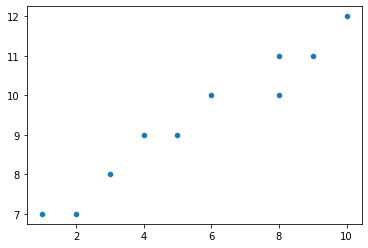

In [1379]:
sns.scatterplot(x=X,y=Y)

<AxesSubplot:>

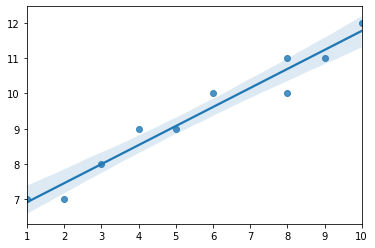

In [1380]:
sns.regplot(x=X,y=Y)

Write a function `calc_slope` that returns $\hat{m}$ for a given set of x and y data.

The formula is:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

In [1381]:
np.corrcoef(X,Y)

array([[1.        , 0.97572421],
       [0.97572421, 1.        ]])

In [1382]:
# calcute p-corr
p_corr = np.corrcoef(X,Y)[0,1]
p_corr

0.9757242123141516

In [1383]:
# y std
y_std =  Y.std()
y_std


1.624807680927192

In [1384]:
# alternative
# np.std(Y)

In [1385]:
# x std
x_std =  X.std()
x_std

2.9393876913398134

In [1386]:
# calculate  m
m = p_corr * (y_std / x_std)
m


0.5393518518518519

In [1387]:
# slope function
def slope(X,Y):
    # corr_coef
    p_corr = np.corrcoef(X,Y)[0][1]
    #std y
    std_y = np.std(Y)
    #std X
    std_x = X.std()
    #m
    m = p_corr*(std_y/std_x)
    return m

In [1388]:
# calculate slope for our data 
slope(X,Y)


0.5393518518518519

## Calculating the Intercept

Now that we have our estimated slope $\hat{m}$, we can calculate the estimated intercept $\hat{c}$.

As a reminder, the calculation for the best-fit line's y-intercept is:

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Write a function `calc_intercept` that returns $\hat{c}$ for a given $\hat{m}$, x, and y.


In [1389]:
# get the y mean
y_mean = Y.mean()
y_mean

9.4

In [1390]:
# get the x mean
x_mean = X.mean()
x_mean


5.6

In [1391]:
# calculate the intecept
y_mean - (slope(X,Y)*x_mean)


6.37962962962963

In [1392]:
# get the intercept function
def get_c(X,Y):
    #y mean
   Y_mean = Y.mean() 
   #x_mean
   X_mean = np.mean(X)
   
   m = slope(X,Y)
   
   c = Y_mean - (X_mean*m)
   
   return c
   

In [1393]:
# get c for our data set 
c = Y.mean() - (X.mean()*slope(X,Y))
c

6.37962962962963

## Predicting a datapoint 

In [1394]:
# y = mx + c

y = slope(X,Y)*2000 + c
y

1085.0833333333333

In [1395]:
# to predict a data point 
#when x is  2
y = slope(X,Y)*3.5 + get_c(X,Y)
y


8.26736111111111

# Todo

In [1396]:
# make a model for sales(y -(depedent)) and any other column(x) 
# in the provided dataset to create a model to predict y using 
# the provided dataset
# create a new column (sales_pred)  and add it to the dataframe  

df = pd.read_csv("./data/advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [1397]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [1398]:
y = df['sales']
print(y.mean())
print(y.std())

14.0225
5.217456565710478


In [1399]:
x = df['TV']
print(x.mean())
print(x.std())

147.0425
85.85423631490808


In [1400]:
p_corr=np.corrcoef(x, y)[0,1]
p_corr

0.7822244248616061

In [1401]:
m = p_corr*(y.std()/x.std())
m

0.04753664043301972

In [1402]:
c = y.mean()-(m*(x.mean())) 
c

7.032593549127699

In [1403]:
y = (m*44.5) + c
y

9.147974048397076

In [1404]:
df['sales_pred(tv)'] = m*(df['TV']) + c
df.head()

c:\Users\sharo\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Unnamed: 0,TV,radio,newspaper,sales,sales_pred(tv)
0,1,230.1,37.8,69.2,22.1,17.970775
1,2,44.5,39.3,45.1,10.4,9.147974
2,3,17.2,45.9,69.3,9.3,7.850224
3,4,151.5,41.3,58.5,18.5,14.234395
4,5,180.8,10.8,58.4,12.9,15.627218


In [1405]:
df['residuals'] = np.abs(df['sales'])-df['sales_pred(tv)']
print(df['residuals'].mean())
df.head()


-1.7053025658242404e-15


,Unnamed: 0,TV,radio,newspaper,sales,sales_pred(tv),residuals
0,1,230.1,37.8,69.2,22.1,17.970775,4.129225
1,2,44.5,39.3,45.1,10.4,9.147974,1.252026
2,3,17.2,45.9,69.3,9.3,7.850224,1.449776
3,4,151.5,41.3,58.5,18.5,14.234395,4.265605
4,5,180.8,10.8,58.4,12.9,15.627218,-2.727218


In [1406]:
y_pred = df['sales_pred(tv)'].mean()
y_test = df['sales'].mean()
err = y_test - y_pred
err

-1.7763568394002505e-15

In [1407]:
y = df['sales']
print(y.mean())
print(y.std())

14.0225
5.217456565710478


In [1408]:
x = df['radio']
print(x.mean())
print(x.std())

23.264000000000006
14.846809176168724


In [1409]:
p_corr=np.corrcoef(x, y)[0,1]
p_corr

0.5762225745710551

In [1410]:
m = p_corr*(y.std()/x.std()) # m is the slope
m

0.2024957833924396

In [1411]:
c = y.mean()-(m*(x.mean())) # c is the intercept
c

9.311638095158285

In [1412]:
df['sales_pred(radio)'] = m*(df['radio']) + c # or #df['sales_pred(radio)'] = df['radio'].apply('sales_pred(radio)')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,sales_pred(tv),residuals,sales_pred(radio)
0,1,230.1,37.8,69.2,22.1,17.970775,4.129225,16.965979
1,2,44.5,39.3,45.1,10.4,9.147974,1.252026,17.269722
2,3,17.2,45.9,69.3,9.3,7.850224,1.449776,18.606195
3,4,151.5,41.3,58.5,18.5,14.234395,4.265605,17.674714
4,5,180.8,10.8,58.4,12.9,15.627218,-2.727218,11.498593


In [1413]:
y_pred = df['sales_pred(radio)'].mean()
y_test = df['sales'].mean()
err = y_test - y_pred
err

0.0

In [1414]:
x = df['newspaper']
p_corr=np.corrcoef(x, y)[0,1]
m = p_corr*(y.std()/x.std())
print(m)
c = y.mean()-(m*(x.mean())) 
df['sales_pred(newspaper)'] = m*(df['newspaper']) + c
y_pred = df['sales_pred(newspaper)'].mean()
y_test = df['newspaper'].mean()
err = y_test - y_pred
err

0.05469309847227334


16.531499999999994

# Linear Rigression With StatsModel

An example of linear Regression model ands it evalution using stats model 

In [1415]:
# read data and display head 
df = pd.read_csv("./data/advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [1416]:
# get X and Y

X = df["TV"]
Y = df["sales"]



<AxesSubplot:xlabel='TV', ylabel='sales'>

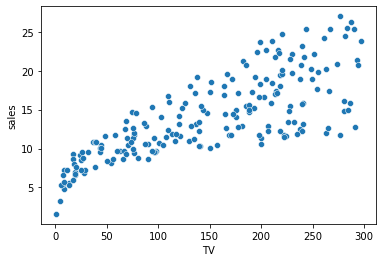

In [1417]:
# scatter plot 
sns.scatterplot(x=X,y=Y)

<AxesSubplot:xlabel='TV', ylabel='sales'>

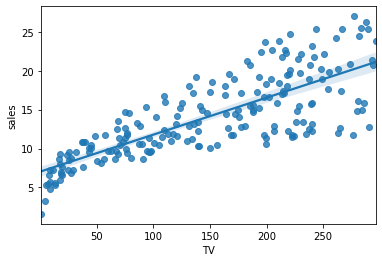

In [1418]:
sns.regplot(x=X,y=Y)

In [1419]:
import statsmodels.api as sm

In [1420]:
# build model 
model = sm.OLS(endog=Y, exog=sm.add_constant(X))



In [1421]:
# train the model
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.47e-42
Time:                        10:15:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1422]:
# get X and Y

X = df["radio"]
Y = df["sales"]



<AxesSubplot:xlabel='radio', ylabel='sales'>

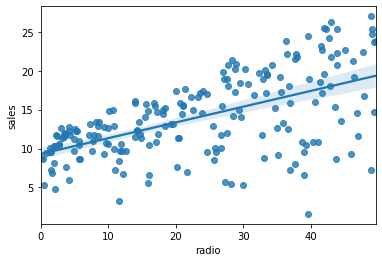

In [1423]:
sns.regplot(x=X, y=Y)

In [1424]:
# build model 
model = sm.OLS(endog=Y, exog=sm.add_constant(X))



In [1431]:
# train the model
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           4.35e-19
Time:                        10:15:34   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1433]:
X = df[['TV', 'radio', 'newspaper']]
Y = df['sales']

In [1434]:
model = sm.OLS(endog = Y, exog = sm.add_constant(X))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.58e-96
Time:                        10:27:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating and Interpreting the Model

### F-Test 
#### Measuring Statistical Significance

So, is our overall model statistically significant? Let's frame this in terms of a null and alternative hypothesis:

    H 0 (null hypothesis): the intercept-only model fits the data just as well as (or better than) our model
    H a (alternative hypothesis): our model fits the data better than the intercept-only model


In [1426]:
# F1- score
results.f_pvalue,results.fvalue

(4.354966001766854e-19, 98.42158756679585)

    *For fp-values below the significant value e.g 0.05 we reject the null hypothesis*

## R-Squared
#### Measuring Goodness of Fit
We can quantify how much of the variation in the dependent variable is explained by our model. This measure is called the R 2 or coefficient of determination.

In [1427]:
#r2 score
results.rsquared


0.33203245544529525

    *out put is a paercentage between 0 and 1 higher values are better*

### Other evaluation Metrics
#### Model parameters:

In [1428]:
# y=mx+c
# m,c
results



#### Model parameter p-values:

In [1429]:
# p-values  for m & c


#### Model Confidence intervals 
returns value ranges at 95% percent confidence intervals 

In [1430]:
# confidence intervals

